In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pwd

'/Users/clintguymon/github/safetyinjc/stewardship/supportfiles'

In [7]:
df.columns

Index(['State Code', 'County Code', 'Site Number', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name',
       'Duration Description', 'Pollutant Standard', 'Date (Local)', 'Year',
       'Day In Year (Local)', 'Units of Measure', 'Exceptional Data Type',
       'Nonreg Observation Count', 'Observation Count', 'Observation Percent',
       'Nonreg Arithmetic Mean', 'Arithmetic Mean',
       'Nonreg First Maximum Value', 'First Maximum Value',
       'First Maximum Hour', 'AQI', 'Daily Criteria Indicator', 'Tribe Name',
       'State Name', 'County Name', 'City Name', 'Local Site Name', 'Address',
       'MSA or CBSA Name', 'Data Source'],
      dtype='object')

In [4]:
#first import data
df = pd.read_csv('daily_49_049_4001_2024.csv')

In [5]:
#describe the dataframe
df.describe()

,State Code,County Code,Site Number,Parameter Code,POC,Latitude,Longitude,Year,Day In Year (Local),Exceptional Data Type,Nonreg Observation Count,Observation Count,Observation Percent,Nonreg Arithmetic Mean,Arithmetic Mean,Nonreg First Maximum Value,First Maximum Value,First Maximum Hour,Tribe Name
count,15064.0,15064.0,15064.0,15064.000000,15064.000000,15064.000000,1.506400e+04,15064.0,15064.000000,0.0,0.0,15064.000000,15064.000000,0.0,15064.000000,0.0,15064.000000,15064.000000,0.0
mean,49.0,49.0,4001.0,70031.419079,2.488781,40.341389,-1.117136e+02,2024.0,172.268654,NaN,NaN,10.117831,99.611458,NaN,123.655209,NaN,129.196646,5.092007,NaN
std,0.0,0.0,0.0,16464.573943,1.729003,0.000000,2.842265e-14,0.0,103.104946,NaN,NaN,11.057783,3.117207,NaN,303.634096,NaN,303.863466,7.318933,NaN
min,49.0,49.0,4001.0,42101.000000,1.000000,40.341389,-1.117136e+02,2024.0,1.000000,NaN,NaN,1.000000,8.000000,NaN,-12.000000,NaN,-12.000000,0.000000,NaN
25%,49.0,49.0,4001.0,62101.000000,1.000000,40.341389,-1.117136e+02,2024.0,85.000000,NaN,NaN,1.000000,100.000000,NaN,0.187500,NaN,0.259000,0.000000,NaN
50%,49.0,49.0,4001.0,68107.000000,2.000000,40.341389,-1.117136e+02,2024.0,169.000000,NaN,NaN,1.000000,100.000000,NaN,4.000000,NaN,5.700000,0.000000,NaN
75%,49.0,49.0,4001.0,88101.000000,5.000000,40.341389,-1.117136e+02,2024.0,257.000000,NaN,NaN,24.000000,100.000000,NaN,24.500000,NaN,31.500000,9.000000,NaN
max,49.0,49.0,4001.0,88403.000000,5.000000,40.341389,-1.117136e+02,2024.0,366.000000,NaN,NaN,24.000000,100.000000,NaN,1440.000000,NaN,1440.000000,23.000000,NaN


In [10]:
#group dataset by parameter name to plot CO
dfCO = df.groupby('Parameter Name').get_group('Carbon monoxide')

In [15]:
#convert date local object to datetime
dfCO['Date (Local)'] = pd.to_datetime(dfCO['Date (Local)'])

/var/folders/6d/1jr2w1qx1rnd2nkndlq4hc700000gn/T/ipykernel_68266/1272489991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCO['Date (Local)'] = pd.to_datetime(dfCO['Date (Local)'])


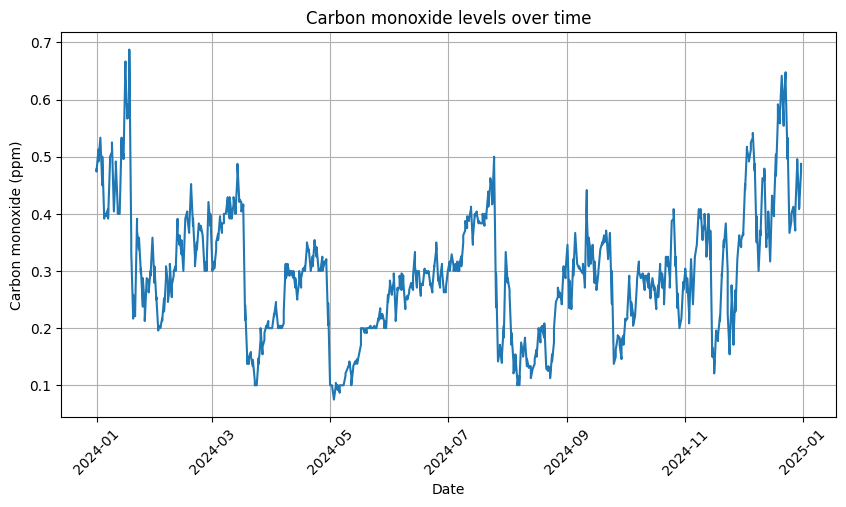

In [17]:
#plot the dfCO data by date
plt.figure(figsize=(10, 5))
plt.plot(dfCO['Date (Local)'], dfCO['Arithmetic Mean'])
plt.title('Carbon monoxide levels over time')
plt.xlabel('Date')
plt.ylabel('Carbon monoxide (ppm)')
plt.xticks(rotation=45)
plt.grid()